In [960]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [961]:
df_flights = pd.read_csv('flights.csv', nrows = 10000).drop('Unnamed: 0', axis=1)

In [962]:
df_fuel = pd.read_csv('fuel_consumption.csv').drop('Unnamed: 0', axis=1)

In [963]:
df_test = pd.read_csv('flights_test.csv', nrows = 10000).drop('Unnamed: 0', axis=1)

In [964]:
df_passengers = pd.read_csv('passengers_aggregated.csv').drop('Unnamed: 0', axis=1)

In [965]:
# Dropping rows where target variable is null
df_flights.arr_delay.isnull().sum()
df_flights = df_flights[df_flights['arr_delay'].notna()]
df_flights.arr_delay.isnull().sum()

0

In [966]:
from sklearn.model_selection import train_test_split

In [967]:
y = df_flights[['arr_delay']]

In [968]:
# splitting the dataset for training and testing
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_flights, y, test_size=0.3, random_state=42)

In [969]:
df_delay_type = df_flights[['carrier_delay','weather_delay','nas_delay', 'security_delay', 'late_aircraft_delay']]

In [970]:
s_delay_type = (df_delay_type != 0).sum()
s_delay_type

carrier_delay          8368
weather_delay          7124
nas_delay              8711
security_delay         6963
late_aircraft_delay    8602
dtype: int64

[[Text(0, 0, 'security'),
  Text(1, 0, 'weather'),
  Text(2, 0, 'carrier'),
  Text(3, 0, 'nas'),
  Text(4, 0, 'late_aircraft')]]

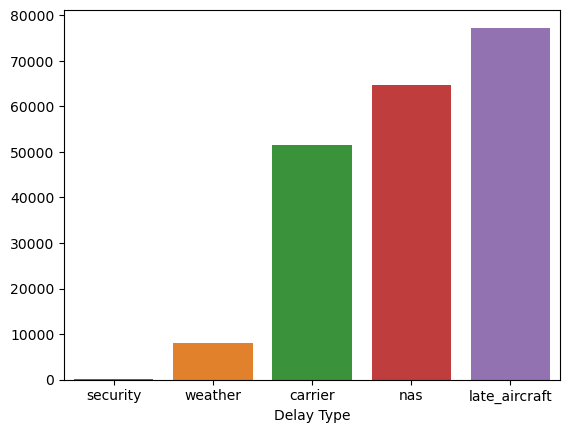

In [971]:
# Find out whats causing majority of the delays
ax = sns.barplot(data=df_delay_type.sum(), x = df_delay_type.sum().index, y = df_delay_type.sum().values)
ax.set(xlabel = "Delay Type")
ax.set(xticklabels=['security','weather','carrier','nas','late_aircraft'])

In [972]:
# Checking whether columns are equal 
df_flights['mkt_carrier_fl_num'].equals(df_flights['op_carrier_fl_num'])


True

In [973]:
df_flights.dest.nunique() == df_flights.dest_airport_id.nunique()

True

In [974]:
df_flights[['carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']] = df_flights[['carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']].fillna(0)

In [975]:
# changing date strings to date data types
df_flights['fl_date'] = pd.to_datetime(df_flights['fl_date'])

In [976]:
# splitting the city and state for analysis
df_flights[['org_city','org_state']] = df_flights.origin_city_name.str.split(",", expand = True)
df_flights[['dest_city','dest_state']] = df_flights.dest_city_name.str.split(",", expand = True)

In [977]:
y = df_flights[['arr_delay']]

In [978]:
X_train, X_test, y_train, y_test = train_test_split(df_flights, y, test_size=0.3, random_state=42)

In [979]:
# Calculating the daily air traffic at the origin airport
df_flight_traffic = X_train[['origin_airport_id', 'flights']].sort_values(['origin_airport_id']).groupby(['origin_airport_id']).sum('flights')
df_flight_traffic

,flights
origin_airport_id,
10135,2.0
10136,1.0
10140,28.0
10158,6.0
10185,1.0
...,...
15370,14.0
15376,17.0
15412,7.0


In [1016]:
# Calculating the traffic at the dest airport
df_dest_traffic = X_train[['dest_airport_id', 'flights']].groupby(['dest_airport_id']).sum()
df_dest_traffic.rename(columns={'flights':'dest_traffic'},inplace=True)

In [1017]:
# calculating air traffic at all the states
df_org_state_traffic = X_train[['org_state','flights']].groupby('org_state').sum()
df_dest_state_traffic = X_train[['dest_state','flights']].groupby('dest_state').sum()
df_dest_state_traffic.rename(columns={'flights':'state_traffic'},inplace=True)

In [806]:
X_train.to_csv('X_train.csv', index=False)

In [982]:
X_train.rename(columns = { 'mkt_unique_carrier': 'unique_carrier'}, inplace=True)

In [983]:
df_passengers_all = pd.read_csv('pass_sample.csv')

In [984]:
df_passengers_all.columns

Index(['Unnamed: 0', 'departures_scheduled', 'departures_performed', 'payload',
       'seats', 'passengers', 'freight', 'mail', 'distance', 'ramp_to_ramp',
       'air_time', 'unique_carrier', 'airline_id', 'unique_carrier_name',
       'region', 'carrier', 'carrier_name', 'carrier_group',
       'carrier_group_new', 'origin_airport_id', 'origin_city_market_id',
       'origin', 'origin_city_name', 'origin_country', 'origin_country_name',
       'dest_airport_id', 'dest_city_market_id', 'dest', 'dest_city_name',
       'dest_country', 'dest_country_name', 'aircraft_group', 'aircraft_type',
       'aircraft_config', 'year', 'month', 'distance_group', 'class',
       'data_source'],
      dtype='object')

In [985]:
# dropping irrelavant columns for analysis
df_pass_clean = df_passengers_all[['year','month','unique_carrier','airline_id','origin_airport_id','dest_airport_id','payload','passengers','seats']]

In [986]:
df_pass_orig = df_pass_clean[['year','month','unique_carrier','origin_airport_id','payload','passengers']]

In [987]:
#finding the average monthly passenger and payload per carrier
df_pass_per_carrier = df_pass_orig[['month','unique_carrier','payload','passengers']].groupby(['month','unique_carrier']).mean()

In [988]:
X_train.merge(df_pass_per_carrier, on = 'unique_carrier', how='inner')

,fl_date,unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,first_dep_time,total_add_gtime,longest_add_gtime,no_name,org_city,org_state,dest_city,dest_state,payload,passengers
0,2019-12-01,UA,UA_CODESHARE,UA,3564,YX,N729YX,3564,11193,CVG,...,NaN,NaN,NaN,NaN,Cincinnati,OH,Newark,NJ,8.282556e+05,2516.453313
1,2019-12-01,UA,UA_CODESHARE,UA,6233,YV,N80343,6233,12266,IAH,...,NaN,NaN,NaN,NaN,Houston,TX,Oklahoma City,OK,8.282556e+05,2516.453313
2,2019-12-01,UA,UA_CODESHARE,UA,6253,YV,N82338,6253,12266,IAH,...,NaN,NaN,NaN,NaN,Houston,TX,Louisville,KY,8.282556e+05,2516.453313
3,2019-12-01,UA,UA_CODESHARE,UA,3618,YX,N862RW,3618,11433,DTW,...,NaN,NaN,NaN,NaN,Detroit,MI,Washington,DC,8.282556e+05,2516.453313
4,2019-12-01,UA,UA_CODESHARE,UA,3569,YX,N862RW,3569,12264,IAD,...,NaN,NaN,NaN,NaN,Washington,DC,Greer,SC,8.282556e+05,2516.453313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6897,2019-12-01,F9,F9,F9,1062,F9,N723FR,1062,13204,MCO,...,NaN,NaN,NaN,NaN,Orlando,FL,Cincinnati,OH,5.090472e+05,2033.903251
6898,2019-12-01,F9,F9,F9,2959,F9,N356FR,2959,11618,EWR,...,NaN,NaN,NaN,NaN,Newark,NJ,Miami,FL,5.090472e+05,2033.903251
6899,2019-12-01,F9,F9,F9,914,F9,N354FR,914,14635,RSW,...,NaN,NaN,NaN,NaN,Fort Myers,FL,Detroit,MI,5.090472e+05,2033.903251
6900,2019-12-01,F9,F9,F9,118,F9,N719FR,118,13303,MIA,...,NaN,NaN,NaN,NaN,Miami,FL,San Juan,PR,5.090472e+05,2033.903251


In [1018]:
# Calculating the average monthly passengers per origin airport
df_pass_airport = df_pass_clean[['origin_airport_id','passengers']].groupby('origin_airport_id').mean()
df_pass_airport.rename(columns={'passengers':'passengers_airport'},inplace=True)

In [990]:
#calculating the average total gallons of fuel used per carrier
df_fuel_analysis = df_fuel[['unique_carrier', 'total_gallons']]
df_fuel_carr = df_fuel_analysis.groupby('unique_carrier').mean()

In [991]:
df_flights_subset = pd.read_csv('flight_subset.csv')

In [992]:
#calculating the average delay per carrier
df_carr_delay = df_flights_subset[['avg_arr_delay','op_unique_carrier']].groupby('op_unique_carrier').mean()
df_carr_delay

,avg_arr_delay
op_unique_carrier,
9E,5.104284
9K,-3.548622
AA,5.762940
AS,-1.203642
AX,16.583439
B6,10.848790
C5,22.281951
CP,6.254918
DL,-0.460889


In [1019]:
# calculating the average delay by carriers per month
df_delay_monthly = df_flights_subset[['month','op_unique_carrier','avg_arr_delay']].groupby(['month','op_unique_carrier']).mean()
df_delay_monthly.rename(columns={'avg_arr_delay':'avg_arr_delay_per_month'},inplace=True)

In [994]:
X_train['month'] = pd.DatetimeIndex(X_train['fl_date']).month

In [1033]:
num_feats=['distance','dest_traffic','state_traffic','payload','passengers','passengers_airport','avg_arr_delay','avg_arr_delay_per_month']

In [1029]:
def get_features(df):
    df = df[df['arr_delay'].notna()]
    df = df.loc[:,df_test.columns]
    df['fl_date'] = pd.to_datetime(df_flights['fl_date'])
    df[['dest_city','dest_state']] = df.dest_city_name.str.split(",", expand = True)
    df['month'] = pd.DatetimeIndex(df['fl_date']).month
    df.rename(columns={'mkt_unique_carrier':'unique_carrier'},inplace=True)
    df = df.merge(df_dest_traffic, on='dest_airport_id', how='inner')
    df = df.merge(df_dest_state_traffic, on='dest_state', how='inner')
    df = df.merge(df_pass_per_carrier, on='unique_carrier', how='inner')
    df = df.merge(df_pass_airport, on='origin_airport_id', how='inner')
    df = df.merge(df_carr_delay, on='op_unique_carrier', how='inner')
    df = df.merge(df_delay_monthly, on=['month','op_unique_carrier'], how='inner')  
    df = df.loc[:,num_feats]
    return df
    

In [1030]:
X_train_upd = get_features(X_train2)

In [1050]:
X_test_upd = get_features(X_test2)

In [1055]:
X_train_upd

,distance,dest_traffic,state_traffic,payload,passengers,passengers_airport,avg_arr_delay,avg_arr_delay_per_month
0,569.0,70.0,81.0,8.282556e+05,2516.453313,762.627266,3.761827,3.463058
1,569.0,70.0,81.0,8.282556e+05,2516.453313,762.627266,3.761827,3.463058
2,948.0,93.0,649.0,1.839704e+06,5144.523833,762.627266,3.761827,3.463058
3,645.0,70.0,81.0,8.282556e+05,2516.453313,949.140127,3.761827,3.463058
4,844.0,116.0,828.0,8.282556e+05,2516.453313,949.140127,3.761827,3.463058
...,...,...,...,...,...,...,...,...
6897,174.0,169.0,289.0,1.839704e+06,5144.523833,749.176471,6.119923,6.245440
6898,122.0,169.0,289.0,1.839704e+06,5144.523833,784.450980,6.119923,6.245440
6899,436.0,169.0,289.0,1.839704e+06,5144.523833,757.538462,6.119923,6.245440
6900,213.0,169.0,289.0,1.839704e+06,5144.523833,548.898305,6.119923,6.245440


In [1034]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [1035]:
scaler = StandardScaler()
scaler.fit(X_train_upd)
X_train_scaled = scaler.transform(X_train_upd)
X_test_scaled = scaler.transform(X_test_upd)

In [1036]:
from sklearn.linear_model import LinearRegression

In [1038]:
reg = LinearRegression()
reg.fit(X_train_scaled, y_train2)

LinearRegression()

In [1049]:
X_test2

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
6006,2019-12-01,DL,DL,DL,2291,DL,N607AT,2291,10397,ATL,...,534.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
505,2019-12-01,WN,WN,WN,3610,WN,N928WN,3610,10397,ATL,...,425.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7550,2019-12-01,WN,WN,WN,5382,WN,N475WN,5382,10693,BNA,...,587.0,7.0,0.0,18.0,0.0,0.0,NaN,NaN,NaN,NaN
905,2019-12-01,F9,F9,F9,2138,F9,N722FR,2138,12889,LAS,...,1222.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5518,2019-12-01,DL,DL,DL,1906,DL,N371NW,1906,11433,DTW,...,409.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8341,2019-12-01,WN,WN,WN,3461,WN,N7751A,3461,11292,DEN,...,1491.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
848,2019-12-01,F9,F9,F9,2051,F9,N705FR,2051,13342,MKE,...,1524.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2488,2019-12-01,AA,AA_CODESHARE,AA,4228,MQ,N286NN,4228,13930,ORD,...,642.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9239,2019-12-01,WN,WN,WN,5745,WN,N282WN,5745,12954,LGB,...,324.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1056]:
from sklearn.metrics import r2_score
y_train_pred = reg.predict(X_train_scaled)
y_test_pred = reg.predict(X_test_scaled)

r2_train = r2_score(y_train2, y_train_pred)


print(f'Train R^2:\t{r2_train}')



Train R^2:	0.0019192269110852589
